Import Libraries

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings

# Save the graphs in the notebook
%matplotlib inline
warnings.filterwarnings('ignore')

First Look at the Dataset

In [14]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TWO_CENTURIES_OF_UM_RACES.csv')

In [15]:
df.head(10)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
5,2018,06.01.2018,Selva Costera (CHI),50km,22,6:25:01 h,NaN,ARG,1974.0,M,M40,7.792,5
6,2018,06.01.2018,Selva Costera (CHI),50km,22,6:28:00 h,Los Patagones,ARG,1979.0,F,W35,7.732,6
7,2018,06.01.2018,Selva Costera (CHI),50km,22,6:32:24 h,Reaktiva Chile,CHI,1967.0,F,W50,7.645,7
8,2018,06.01.2018,Selva Costera (CHI),50km,22,6:39:08 h,Puro Trail Osorno,CHI,1985.0,M,M23,7.516,8
9,2018,06.01.2018,Selva Costera (CHI),50km,22,6:45:11 h,Marlene Flores Team,CHI,1976.0,M,M40,7.404,9


In [16]:
df.shape

(7461195, 13)

In [17]:
df.dtypes

,0
Year of event,int64
Event dates,object
Event name,object
Event distance/length,object
Event number of finishers,int64
Athlete performance,object
Athlete club,object
Athlete country,object
Athlete year of birth,float64
Athlete gender,object


Clean Up the Data

For reducing the weight of this database, I will filter it with only the races with runners from USA, 50 km and 50 mi distances and which happened in the year of 2020.

In [20]:
# Check the units
df[df['Event distance/length'] == '50km']
# 50km
# 50mi

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461089,1995,07.01.1995,Centenary Lakes 50 Km Track Run (AUS),50km,6,4:19:56 h,*QLD,AUS,1956.0,F,W35,11541.0,1046326
7461090,1995,07.01.1995,Centenary Lakes 50 Km Track Run (AUS),50km,6,4:28:57 h,*QLD,AUS,1954.0,M,M40,11154.0,1070007
7461091,1995,07.01.1995,Centenary Lakes 50 Km Track Run (AUS),50km,6,4:46:39 h,*QLD,AUS,1951.0,M,M40,10466.0,345672
7461092,1995,07.01.1995,Centenary Lakes 50 Km Track Run (AUS),50km,6,4:47:39 h,*QLD,AUS,1939.0,M,M55,10429.0,1082443


In [26]:
# Combine 50km/50mi with isin and select only the events for the year 2020.
df[(df['Event distance/length'].isin(['50km', '50mi'])) & (df['Year of event'] == 2020)]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2538571,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,7:34:19 h,日本隊,JPN,1965.0,M,M50,10.627,53107
2538572,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,7:43:50 h,NaN,AUS,1974.0,M,M45,10.409,8785
2538573,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:04:40 h,NaN,TPE,1976.0,M,M40,9.962,4502
2538574,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:30:49 h,台灣大腳ㄚ長跑協會,TPE,1969.0,F,W50,9.452,63964
2538575,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:34:47 h,NaN,TPE,1964.0,M,M55,9.379,4485
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762404,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:36:25 h,AKS Polonia Warszawa,POL,1981.0,F,W35,6.573,860743
2762405,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:36:27 h,*Warszawa,POL,1970.0,F,W45,6.572,860744
2762406,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:44:18 h,Outdoor Training,POL,1993.0,F,W23,6.461,860745
2762407,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,8:04:50 h,PH Bysewo Gdańsk,POL,1976.0,M,M40,6.188,798409


In [27]:
df[df['Event name'].str.contains('(USA)')]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:33:00 h,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461181,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,11:59:37 h,NaN,USA,1941.0,M,M50,6709.0,1045603
7461182,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:01:41 h,NaN,USA,1932.0,M,M60,6690.0,1070463
7461183,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1934.0,F,W60,6674.0,416139
7461184,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1951.0,F,W40,6674.0,1098098


In [29]:
# Combine all the filters together
df[(df['Event distance/length'].isin(['50km', '50mi'])) & (df['Year of event'] == 2020) & (df['Event name'].str.contains('(USA)'))]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760957,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:07:48 h,"*East Lansing, MI",USA,1958.0,F,W60,7.013,816361
2760958,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:27:22 h,"*Traverse City, MI",USA,1977.0,F,W40,6.706,326469
2760959,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:27:24 h,"*Traverse City, MI",USA,1962.0,F,W55,6.705,372174
2760960,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:38:30 h,"*Mason, MI",USA,1981.0,F,W35,6.543,860349


In [30]:
# Creating a New DataFrame 'df2'
df2 = df[(df['Event distance/length'].isin(['50km', '50mi'])) & (df['Year of event'] == 2020) & (df['Event name'].str.contains('(USA)'))]

In [31]:
df2.head(10)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281
2539950,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:42:06 h,"*Seattle, WA",USA,1985.0,F,W23,10.635,810282
2539951,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:49:20 h,"*Camano Island, WA",USA,1961.0,M,M55,10.369,11739
2539952,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:49:50 h,"*Clinton, WA",USA,1970.0,M,M45,10.351,80394
2539953,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:51:00 h,"*Seattle, WA",USA,1975.0,F,W40,10.309,140909
2539954,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,5:02:35 h,"*Sammamish, WA",USA,1979.0,M,M40,9.915,753889


In [32]:
df2.shape

(26524, 13)

In [33]:
# Remove (USA) from event name
df2['Event name'].str.split('(').str.get(0)

,Event name
2539945,West Seattle Beach Run - Winter Edition
2539946,West Seattle Beach Run - Winter Edition
2539947,West Seattle Beach Run - Winter Edition
2539948,West Seattle Beach Run - Winter Edition
2539949,West Seattle Beach Run - Winter Edition
...,...
2760957,Yankee Springs Fall Trail Run Festival
2760958,Yankee Springs Fall Trail Run Festival
2760959,Yankee Springs Fall Trail Run Festival
2760960,Yankee Springs Fall Trail Run Festival


In [34]:
df2['Event name'] = df2['Event name'].str.split('(').str.get(0)

In [35]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281


Clean Up Athlete Age

In [36]:
df2['athlete_age'] = df2['Year of event'] - df2['Athlete year of birth']

Remove 'h' from Athlete Performance Column

In [37]:
df2['Athlete performance'].str.replace('h', '').str.strip()

,Athlete performance
2539945,3:17:55
2539946,4:02:32
2539947,4:07:57
2539948,4:22:02
2539949,4:27:34
...,...
2760957,7:07:48
2760958,7:27:22
2760959,7:27:24
2760960,7:38:30


In [40]:
df2['Athlete performance'] = df2['Athlete performance'].str.replace('h', '').str.strip()

In [54]:
df2.head(10)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43.0
2539950,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:42:06,F,10.635,810282,35.0
2539951,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:49:20,M,10.369,11739,59.0
2539952,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:49:50,M,10.351,80394,50.0
2539953,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:51:00,F,10.309,140909,45.0
2539954,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,5:02:35,M,9.915,753889,41.0


Drop Columns

I dropped the following columns : "Athlete club", "Athlete country", "Athlete year of birth", "Athlete age category", since they are nominal values.

In [56]:
df2 = df2.drop(['Athlete club', 'Athlete country', 'Athlete year of birth', 'Athlete age category'], axis=1, errors='ignore')

In [58]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43.0


Clean Up Null Values

In [59]:
df2.isna().sum()

,0
Year of event,0
Event dates,0
Event name,0
Event distance/length,0
Event number of finishers,0
Athlete performance,0
Athlete gender,0
Athlete average speed,0
Athlete ID,0
athlete_age,235


In [60]:
df2[df2['athlete_age'].isna() == 1]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
2547794,2020,25.01.2020,North Carolina Fat Ass 50 Km,50km,57,6:10:30,M,8.097,811923,NaN
2551331,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,4:46:34,M,10.469,812656,NaN
2551336,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,5:08:36,M,9.721,812657,NaN
2551344,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,5:54:04,F,8.473,658221,NaN
2551348,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,6:07:11,M,8.17,812660,NaN
...,...,...,...,...,...,...,...,...,...,...
2746543,2020,17.10.2020,Black River Trail Classic 50 Km,50km,8,8:31:26,F,5.866,857251,NaN
2749869,2020,17.10.2020,MuleSkinner Endurance 50 Mile Race,50mi,27,11:55:05,M,6.752,857957,NaN
2755985,2020,10.10.2020,Man Against Horse 50 Mile Race,50mi,23,9:03:25,M,8.885,859462,NaN
2755994,2020,10.10.2020,Man Against Horse 50 Mile Race,50mi,23,10:37:00,M,7.579,398583,NaN


In [61]:
df2 = df2.dropna()

In [62]:
df2.shape

(26289, 10)

Check for Duplicate Values

In [63]:
df2[df2.duplicated() == True]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age


Reset Index

In [64]:
df2.reset_index(drop=True)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21.0
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37.0
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43.0
...,...,...,...,...,...,...,...,...,...,...
26284,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:07:48,F,7.013,816361,62.0
26285,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:22,F,6.706,326469,43.0
26286,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:24,F,6.705,372174,58.0
26287,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:38:30,F,6.543,860349,39.0


Fix Types

In [66]:
df2.dtypes

,0
Year of event,int64
Event dates,object
Event name,object
Event distance/length,object
Event number of finishers,int64
Athlete performance,object
Athlete gender,object
Athlete average speed,object
Athlete ID,int64
athlete_age,float64


In [69]:
df2['athlete_age'] = df2['athlete_age'].astype(int)

In [70]:
df2['Athlete average speed'] = df2['Athlete average speed'].astype(float)

In [71]:
df2.dtypes

,0
Year of event,int64
Event dates,object
Event name,object
Event distance/length,object
Event number of finishers,int64
Athlete performance,object
Athlete gender,object
Athlete average speed,float64
Athlete ID,int64
athlete_age,int64


In [72]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43


Rename Columns

* Year of event                  int64
* Event dates                   object
* Event name                    object
* Event distance/length         object
* Event number of finishers      int64
* Athlete performance           object
* Athlete gender                object
* Athlete average speed        float64
* Athlete ID                     int64
* athlete_age                    int64
* dtype: object

In [73]:
df2 = df2.rename(columns={
    'Year of event': 'year',
    'Event dates': 'race_day',
    'Event name': 'race_name',
    'Event distance/length': 'race_length',
    'Event number of finishers': 'race_number_of_finishers',
    'Athlete performance': 'athlete_performance',
    'Athlete gender': 'athlete_gender',
    'Athlete average speed': 'athlete_average_speed',
    'Athlete ID': 'athlete_id'
})

In [74]:
df2.head()

,year,race_day,race_name,race_length,race_number_of_finishers,athlete_performance,athlete_gender,athlete_average_speed,athlete_id,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43


Reorder Columns

In [75]:
df3 = df2[['race_day', 'race_name', 'race_length', 'race_number_of_finishers', 'athlete_id', 'athlete_gender', 'athlete_age', 'athlete_performance', 'athlete_average_speed']]

In [77]:
df3.head()

,race_day,race_name,race_length,race_number_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_performance,athlete_average_speed
2539945,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,71287,M,29,3:17:55,15.158
2539946,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,629508,M,39,4:02:32,12.369
2539947,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,64838,M,21,4:07:57,12.099
2539948,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,704450,M,37,4:22:02,11.449
2539949,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,810281,M,43,4:27:34,11.212


Let's select some specific data so that we can analyze their performance.

In [82]:
df3[df3['race_name'] == 'Everglades 50 Mile Ultra Run ']

,race_day,race_name,race_length,race_number_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_performance,athlete_average_speed
2591476,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,820757,M,27,8:31:39,9.436
2591477,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,46432,M,39,8:31:48,9.433
2591478,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,813617,M,34,8:34:43,9.380
2591479,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,820758,M,33,9:07:35,8.817
2591480,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,647115,M,30,9:15:32,8.691
2591481,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,696063,M,26,9:18:05,8.651
2591482,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,222509,M,23,9:19:10,8.634
2591483,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,820759,M,36,9:20:51,8.608
2591484,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,359359,F,26,9:26:15,8.526
2591485,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,103020,M,42,9:26:16,8.526


In [83]:
df3[df3['athlete_id'] ==  34961]

,race_day,race_name,race_length,race_number_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_performance,athlete_average_speed
2591515,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,34961,M,49,13:57:02,5.768
2642775,26.09.2020,Ride the Wave 50 Mile Race,50mi,16,34961,M,49,15:22:00,5.236
2733842,25.10.2020,Jacks 50k Trail Race,50km,54,34961,M,49,9:07:57,5.475
2755841,10.10.2020,Blue Ridge 50km Ultra,50km,139,34961,M,49,9:01:26,5.541


Charts and Graphs

<Axes: xlabel='race_length', ylabel='Count'>

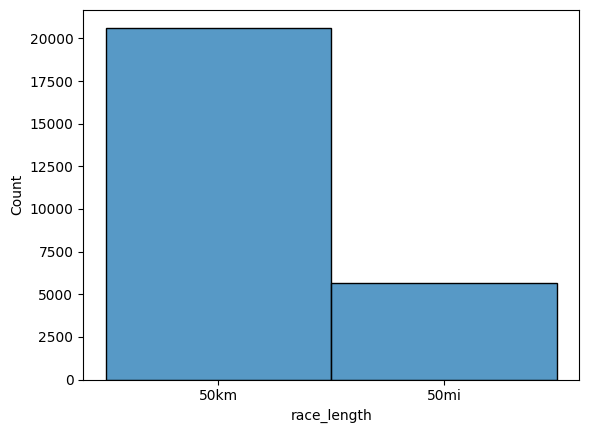

In [84]:
sns.histplot(df3['race_length'])

<Axes: xlabel='race_length', ylabel='Count'>

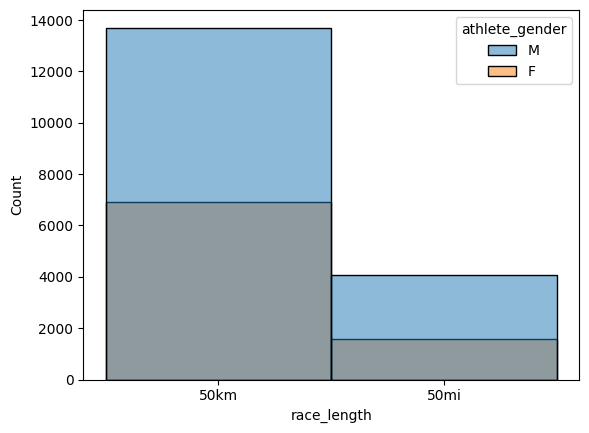

In [85]:
sns.histplot(df3, x='race_length', hue='athlete_gender')

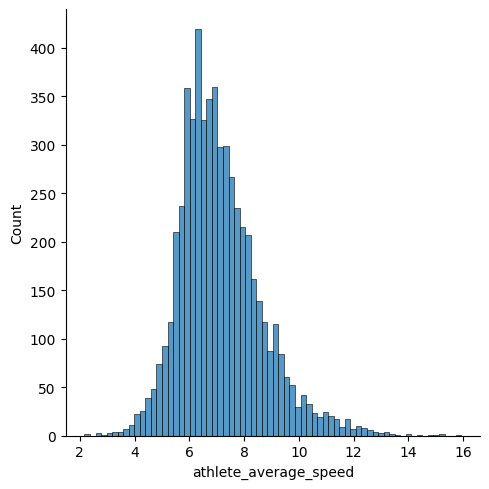

In [86]:
sns.displot(df3[df3['race_length'] == '50mi']['athlete_average_speed'])

<Axes: xlabel='race_length', ylabel='athlete_average_speed'>

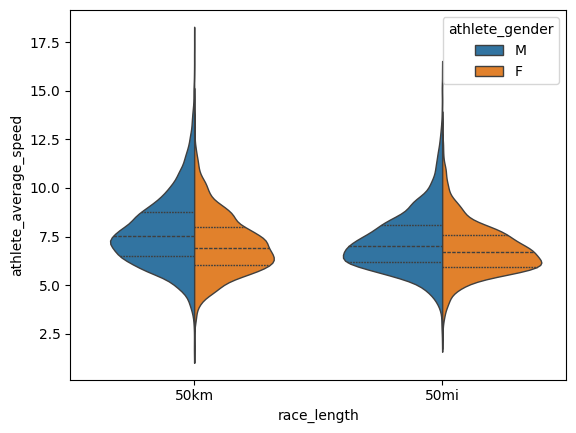

In [87]:
sns.violinplot(data=df3, x='race_length', y='athlete_average_speed', hue='athlete_gender', split=True, inner='quart', linewidth=1)

This athlete is behind the average when it comes to speed.

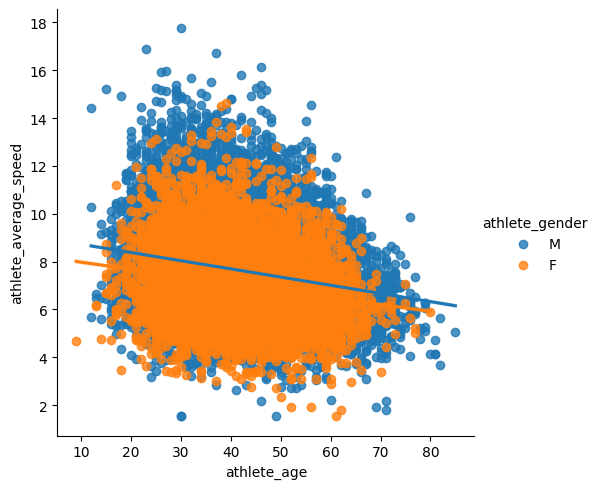

In [88]:
sns.lmplot(data=df3, x='athlete_age', y='athlete_average_speed', hue='athlete_gender')

# Questions We Want to Find Out from the Data

## Difference in speed for the 50km and 50mi, male to female?

In [ ]:
df3.groupby(['race_length', 'athlete_gender'])['athlete_average_speed'].mean()

In [ ]:
df3[df3['athlete_id'] == 34961]['athlete_average_speed'].mean()

Below average.

## What age groups are the best in the 50mi race (20+ races min)

We eliminate the race counts below 20 in age groups each to prevent outliers skew our data.

In [ ]:
df3.query("race_length == '50mi'") \
   .groupby('athlete_age')['athlete_average_speed'] \
   .agg(['mean', 'count']) \
   .sort_values('mean', ascending=False) \
   .query('count > 19') \
   .head(15)

In [ ]:
# Convert the index (athlete_age) to a list
age_list = df3.query("race_length == '50mi'") \
   .groupby('athlete_age')['athlete_average_speed'] \
   .agg(['mean', 'count']) \
   .sort_values('mean', ascending=False) \
   .query('count > 19') \
    .index \
    .tolist()

# Find the position of age 49
age_to_find = 49
if age_to_find in age_list:
    position = age_list.index(age_to_find) + 1  # Add 1 to convert to 1-based indexing
    print(f"Age {age_to_find} is in position {position} in total of {len(age_list)}.")
else:
    print(f"Age {age_to_find} is not in the sorted data.")

## What age groups are the worst in the 50mi race (10+ races min)

In [ ]:
df3.query("race_length == '50mi'") \
   .groupby('athlete_age')['athlete_average_speed'] \
   .agg(['mean', 'count']) \
   .sort_values('mean', ascending=True) \
   .query('count > 9') \
   .head(20)

## Are runners slower in summer than winter?

In [ ]:
df3['race_month'] = df3['race_day'].str.split('.').str.get(1).astype(int)

In [ ]:
df3['race_season'] = df3['race_month'].apply(lambda x: 'Winter' if x > 11 else 'Fall' if x > 8 else 'Summer' if x > 5 else 'Spring' if x > 2 else 'Winter')

In [ ]:
df3.head(25)

In [ ]:
df3.groupby('race_season')['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending=False)

We can see from the data that the runners are most probably slower in summer than winter.

In [ ]:
# 50mi only
df3.query("race_length == '50mi'").groupby('race_season')['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending=False)